In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [2]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(3).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.1, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-3 in yolov8:: 100%|██████████| 19974/19974 [00:02<00:00, 8108.35it/s] 


# **DOWNLOAD WEIGHTS**

In [4]:
yolo8_model_detection =YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 262MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-3 datasets/sixray100-1

# **TRAIN MODEL**

In [9]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs= 100, imgsz=640, batch=24, project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=100, time=None, patience=50, batch=24, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels.cache... 7741 images, 1258 backgrounds, 0 corrupt: 100%|██████████| 7741/7741 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005625000000000001), 103 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.6G      1.099      1.235      1.369         21        640: 100%|██████████| 323/323 [06:04<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.34it/s]

                   all       1537       1627      0.729      0.503       0.59      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.2G       1.01      1.074       1.29         35        640: 100%|██████████| 323/323 [05:58<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.712       0.46      0.556      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.3G       1.07      1.153      1.328         24        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.34it/s]

                   all       1537       1627       0.71      0.438      0.505      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      15.3G      1.109       1.22      1.359         22        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.652      0.476      0.466      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      15.3G      1.111      1.212      1.356         31        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.34it/s]

                   all       1537       1627       0.76      0.467      0.531      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.4G      1.077      1.158       1.33         34        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.706      0.432      0.452      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      15.3G      1.066      1.124      1.324         23        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.682      0.523      0.499      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      15.3G      1.031      1.058      1.297         24        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.34it/s]

                   all       1537       1627      0.703      0.539      0.525      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      15.2G      1.011      1.029      1.291         26        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.34it/s]

                   all       1537       1627      0.761       0.54      0.575       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      15.3G     0.9968     0.9934      1.275         23        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.782      0.595      0.616      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.3G     0.9756     0.9644      1.257         27        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.655      0.578      0.581       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      15.2G     0.9652     0.9562      1.257         33        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.824      0.595      0.636      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      15.3G     0.9529     0.9359      1.248         23        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.834      0.488       0.57      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      15.3G      0.934     0.8948      1.233         28        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.722      0.611      0.648      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.2G     0.9243     0.8934      1.225         37        640: 100%|██████████| 323/323 [05:56<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.909      0.605      0.688      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      15.3G     0.9121     0.8576      1.218         20        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.816      0.599      0.637       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      15.3G     0.8996     0.8499      1.208         23        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.856      0.646      0.696      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      15.4G     0.8783     0.8214      1.188         36        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.723      0.598      0.627       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      15.3G     0.8796     0.8156      1.191         36        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.916      0.568       0.68      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      15.3G     0.8724     0.7934      1.179         27        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.831      0.609      0.664       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      15.2G       0.86     0.7838       1.18         24        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.912      0.603      0.691      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      15.3G     0.8574     0.7842      1.176         31        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.883       0.61      0.679       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      15.3G      0.836     0.7491      1.166         40        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.904      0.564      0.664      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      15.4G     0.8278     0.7413      1.154         31        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.782      0.639      0.693      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      15.3G     0.8198     0.7341      1.148         27        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.34it/s]

                   all       1537       1627      0.918      0.621      0.698      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      15.3G     0.8239     0.7277      1.147         24        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.817      0.644      0.699       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      15.2G     0.8061     0.7025      1.139         22        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.836      0.645      0.707      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      15.3G     0.8051     0.7071      1.134         28        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.33it/s]

                   all       1537       1627      0.864      0.663      0.701      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      15.3G     0.7996     0.7023      1.134         30        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.808      0.621      0.685      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      15.2G      0.791     0.6903      1.127         24        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.824      0.614      0.692      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      15.3G     0.7842     0.6833      1.122         18        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.828      0.711      0.733      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      15.3G     0.7798     0.6826       1.12         26        640: 100%|██████████| 323/323 [05:56<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.875      0.651      0.722      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      15.4G      0.771      0.656       1.11         23        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.869      0.648      0.726      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      15.3G      0.761     0.6434       1.11         34        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.878      0.666       0.73      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      15.3G     0.7582     0.6414      1.103         18        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.813      0.648      0.699      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      15.2G     0.7499     0.6241      1.098         21        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.907      0.639      0.704      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.3G     0.7407     0.6315      1.094         22        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.833      0.651      0.697      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      15.3G      0.745     0.6239      1.091         15        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.878      0.694      0.742      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      15.2G     0.7382     0.6232      1.091         28        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
     40/100      15.3G     0.7335     0.6035      1.089         27        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it].35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627       0.88       0.65      0.722      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      15.3G     0.7309     0.6005      1.081         26        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.873      0.662      0.717      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      15.4G     0.7137     0.5789      1.072         19        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.919      0.649      0.728      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      15.3G     0.7113     0.5741      1.078         23        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.842      0.643      0.711      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      15.1G     0.7067     0.5807      1.071         25        640: 100%|██████████| 323/323 [05:56<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.846      0.693      0.738      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      15.2G     0.7028      0.581       1.07         27        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.797      0.715      0.747      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      15.3G     0.6957     0.5669      1.067         17        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.905      0.687      0.748      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      15.2G      0.685     0.5489      1.064         29        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.874      0.719      0.769      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      15.3G     0.6767     0.5447      1.053         32        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.837      0.674      0.794      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.3G     0.6712     0.5376      1.052         37        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.878      0.711       0.75      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      15.2G     0.6758     0.5433      1.049         28        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.911      0.675      0.758      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      15.3G     0.6732     0.5327      1.046         30        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.909      0.676      0.799      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      15.1G     0.6633      0.521      1.046         23        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.33it/s]

                   all       1537       1627       0.91      0.701      0.799      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      15.2G     0.6588     0.5151      1.043         31        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.892      0.699      0.762      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      15.3G     0.6523     0.5166      1.041         19        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.896      0.693      0.749      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      15.3G     0.6515      0.515       1.04         23        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.852      0.724      0.782      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      15.2G     0.6454     0.5019      1.034         29        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.811      0.673      0.757      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      15.3G     0.6387     0.4972      1.027         21        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.775       0.76      0.779       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      15.3G     0.6364     0.4935      1.028         18        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627        0.9      0.723      0.788      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      15.3G     0.6326     0.4935      1.028         30        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.833       0.71      0.772      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      15.3G     0.6295       0.49      1.018         30        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.754       0.78      0.781      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      15.3G     0.6253     0.4804      1.018         20        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.867       0.71      0.776      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      15.2G     0.6215     0.4759      1.021         25        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.931      0.692      0.792      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      15.3G     0.6222     0.4727      1.018         21        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.923      0.709      0.767      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      15.3G     0.6078     0.4633       1.01         43        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.748      0.763      0.801      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      15.2G     0.6062     0.4594      1.015         19        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.755      0.763      0.782      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      15.3G     0.5939     0.4512          1         16        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.903      0.686      0.772      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      15.3G     0.5906     0.4498      1.003         26        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.882      0.712       0.79      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      15.2G     0.6015     0.4519      1.011         29        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627       0.95      0.671      0.769      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      15.3G     0.5885     0.4367      1.001         41        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.886      0.695      0.765       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      15.3G       0.58     0.4299     0.9969         21        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.899      0.703      0.765      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      15.3G     0.5749     0.4288      0.997         26        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.882      0.717      0.757       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      15.3G     0.5756     0.4297      0.997         23        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.958      0.704      0.773      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      15.3G     0.5691     0.4208     0.9921         25        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.939       0.71      0.782      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      15.2G     0.5624     0.4167     0.9897         19        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.901      0.704      0.775       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.3G     0.5603       0.41     0.9878         35        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627       0.93      0.711      0.787      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      15.3G     0.5587     0.4121     0.9827         29        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.861      0.707      0.782      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      15.2G     0.5492     0.4034      0.979         27        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.836      0.717      0.811      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      15.3G     0.5465     0.3995     0.9759         21        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.711      0.784      0.826      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      15.3G     0.5376     0.3945      0.975         24        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.804      0.749      0.798      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      15.2G     0.5375     0.3905     0.9761         26        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.816      0.761      0.791      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      15.3G       0.53      0.389     0.9728         28        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.774      0.795      0.812      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      15.3G     0.5321     0.3827     0.9703         25        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.823      0.736       0.78      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      15.2G     0.5235      0.379      0.967         21        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.811      0.762      0.821      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      15.3G     0.5156     0.3675      0.964         22        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.774      0.812      0.834      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      15.3G       0.51     0.3685     0.9626         26        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.804      0.785      0.834      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      15.2G     0.5056      0.365     0.9611         20        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.815      0.745      0.794      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      15.3G     0.5062     0.3638     0.9599         25        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.863      0.735      0.797      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      15.3G     0.5002     0.3635     0.9576         13        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.842      0.732      0.783      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      15.2G     0.4932      0.356     0.9575         30        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.842      0.746      0.781      0.682


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      15.3G     0.3882     0.2341     0.8755         15        640: 100%|██████████| 323/323 [05:57<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.876      0.736      0.778      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      15.3G     0.3817     0.2275     0.8707         14        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.775      0.782      0.816      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      15.2G     0.3756     0.2257      0.869         13        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.868      0.731      0.794      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      15.3G     0.3685     0.2193     0.8664         12        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.929      0.717      0.804      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      15.3G     0.3616     0.2125     0.8617         16        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.927       0.72      0.804      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      15.2G     0.3624     0.2139     0.8595         12        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.906      0.712      0.802      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      15.3G     0.3558     0.2091     0.8589         12        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627        0.9      0.713      0.801      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      15.1G     0.3504     0.2075     0.8555         10        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.36it/s]

                   all       1537       1627      0.776      0.773      0.806      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      15.4G     0.3476     0.2037     0.8536         14        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.914      0.712      0.808      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      15.3G     0.3405     0.1999     0.8501         14        640: 100%|██████████| 323/323 [05:56<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:24<00:00,  1.35it/s]

                   all       1537       1627      0.775      0.797      0.826      0.704



100 epochs completed in 10.657 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 87.6MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 87.6MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:26<00:00,  1.25it/s]


                   all       1537       1627      0.775      0.797      0.826      0.704
                 Baton       1537          4      0.959        0.5      0.606      0.235
                Bullet       1537          9      0.281      0.333       0.41      0.327
                   Gun       1537         17      0.319      0.765      0.778      0.711
                Hammer       1537        960      0.993       0.99      0.995      0.979
             HandCuffs       1537         13      0.863      0.969      0.973      0.858
                 Knife       1537         13      0.704      0.846      0.838      0.719
               Lighter       1537         16      0.754      0.688      0.709      0.593
                Pliers       1537        375      0.983      0.951      0.988      0.905
             Powerbank       1537         49      0.962       0.98      0.987      0.861
              Scissors       1537        171      0.934      0.947      0.978       0.85
Speed: 0.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b65aa142860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

# **VALIDATE MODEL**

In [13]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]


                   all       1537       1627      0.778      0.799      0.823      0.699
                 Baton       1537          4      0.927        0.5      0.608      0.218
                Bullet       1537          9      0.294      0.333      0.383      0.312
                   Gun       1537         17      0.327      0.765      0.779      0.711
                Hammer       1537        960      0.994       0.99      0.995      0.979
             HandCuffs       1537         13      0.865       0.99      0.973      0.846
                 Knife       1537         13      0.722      0.846      0.832      0.715
               Lighter       1537         16      0.774      0.688      0.709      0.592
                Pliers       1537        375      0.983       0.95      0.986      0.903
             Powerbank       1537         49      0.959       0.98      0.987      0.862
              Scissors       1537        171      0.934      0.953      0.978      0.853
Speed: 0.3ms preproce

array([    0.21818,     0.31189,     0.71071,     0.97931,     0.84645,     0.71513,     0.59203,     0.90257,     0.86164,     0.85317])

# **MODEL TESTING**


image 1/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23727_png.rf.60d1c5be783f92da65107fcee8eef836.jpg: 608x640 1 Hammer, 62.5ms
image 2/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23887_png.rf.c6d13016a52a1944cd78d76612e8ce1d.jpg: 640x640 1 Hammer, 56.4ms
image 3/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23888_png.rf.e418610f9ea47c4fae3a5e5fae317f7b.jpg: 480x640 (no detections), 30.5ms
image 4/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23890_png.rf.b74b1ca97d05cdd365953dd881cc440e.jpg: 480x640 1 Hammer, 29.2ms
image 5/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23891_png.rf.6e420733a31c0db4c601f246f52d1b19.jpg: 416x640 1 Hammer, 28.2ms
image 6/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23892_png.rf.0b07c8f337874b55451f39d618f2d2c8.jpg: 512x640 (no detections), 30.2ms
image 7/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23893_png.rf.cf68d8f69d036634178b9e2f3afd64c0.jpg: 480x640 1 Hammer

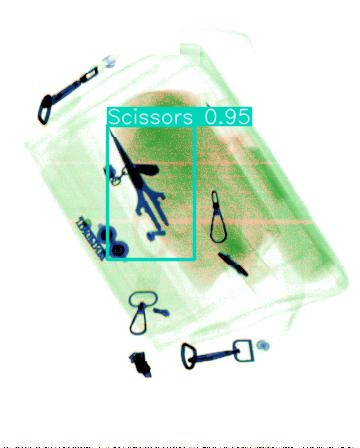

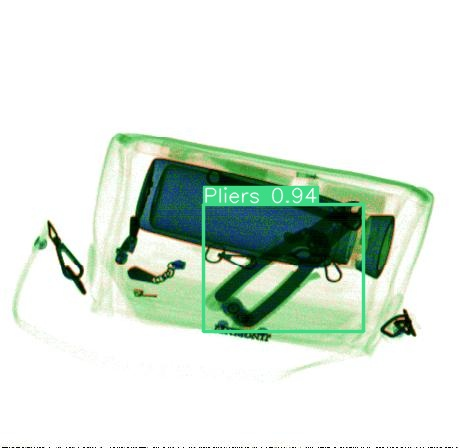

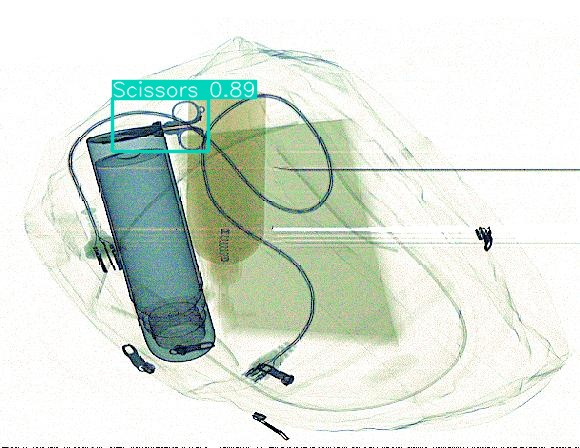

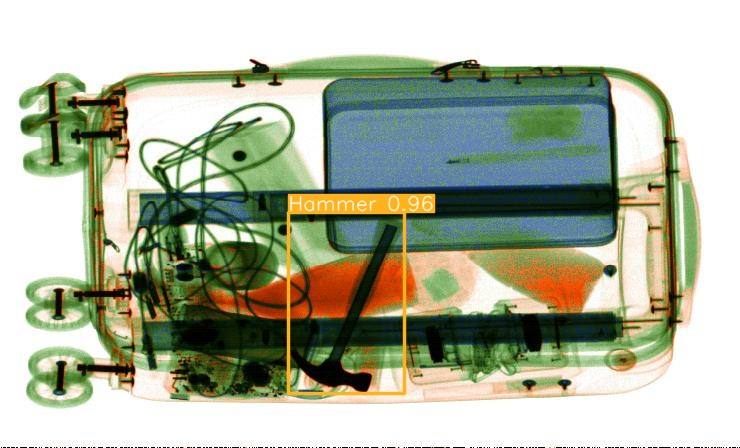

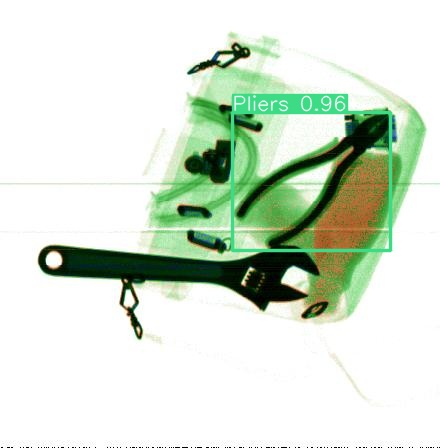

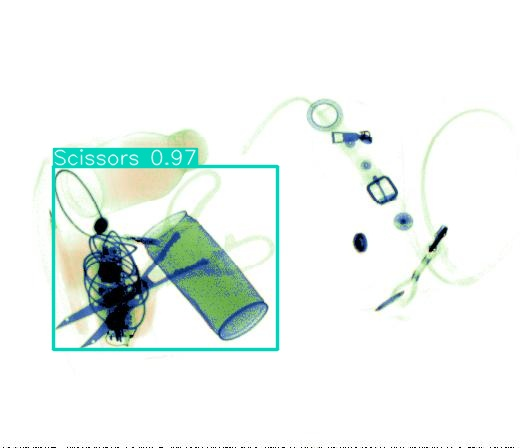

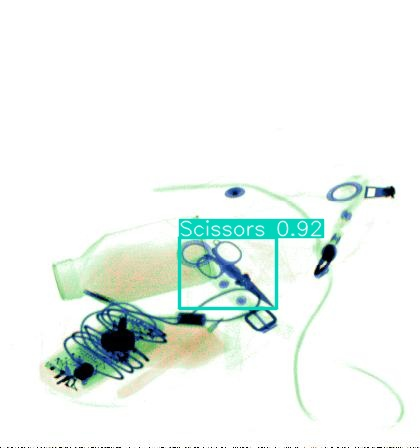

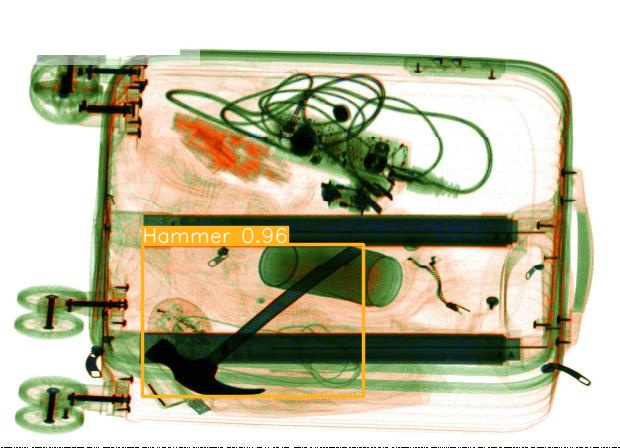

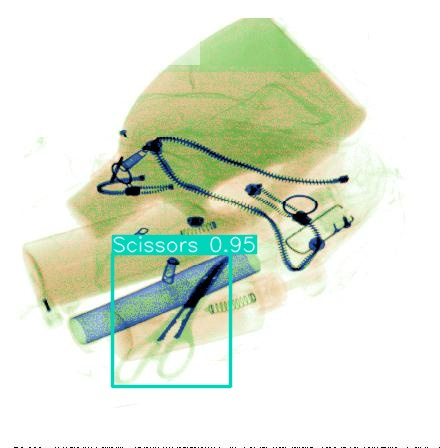

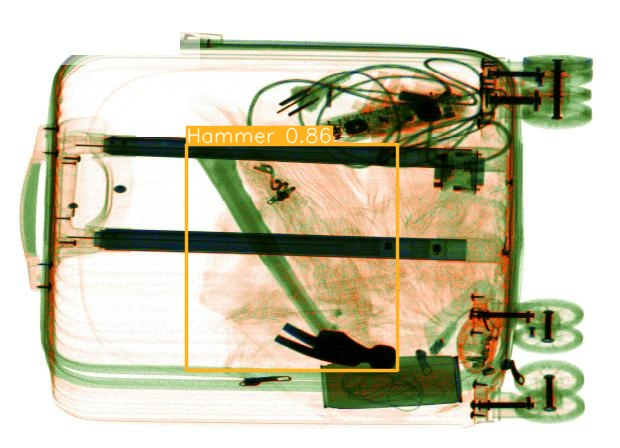

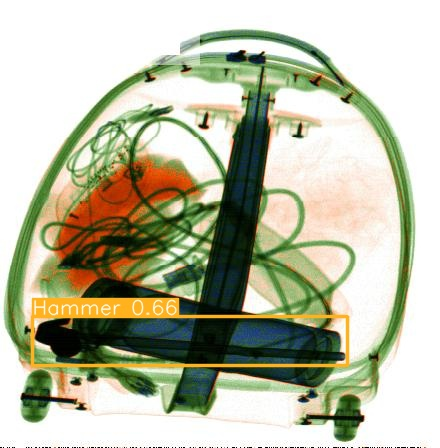

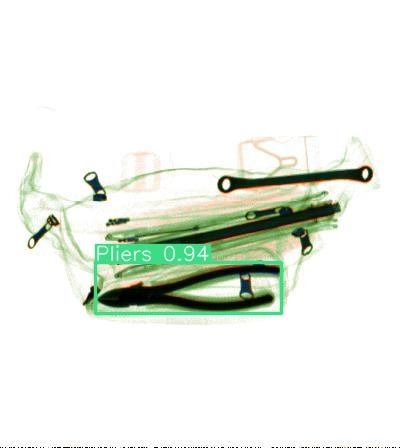

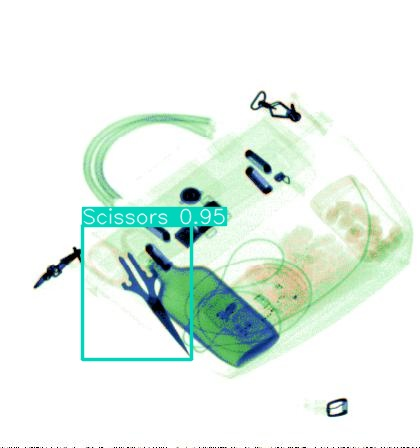

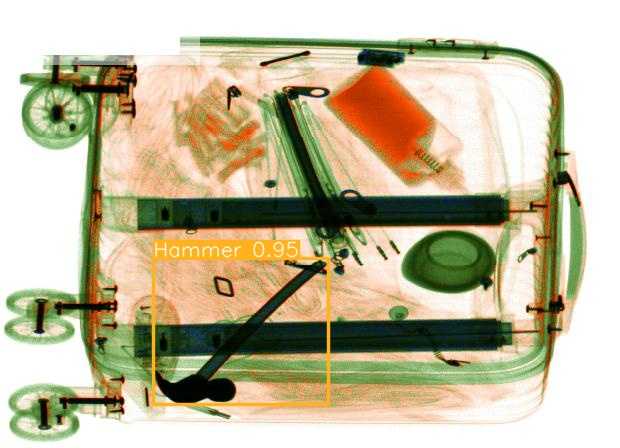

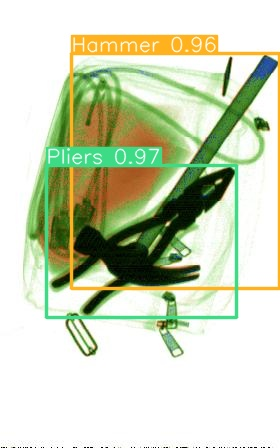

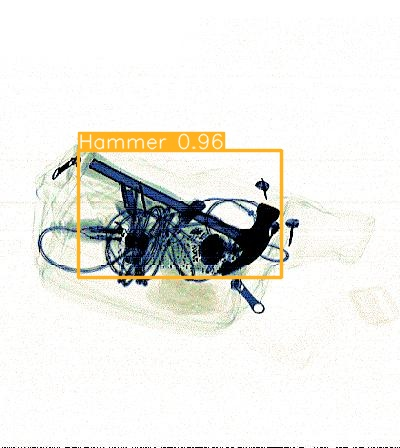

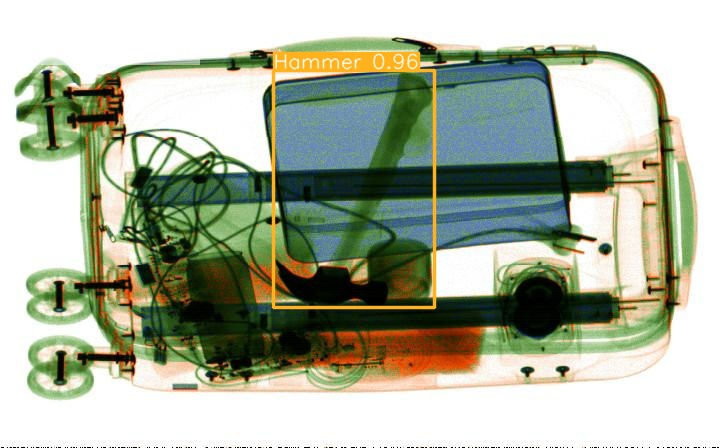

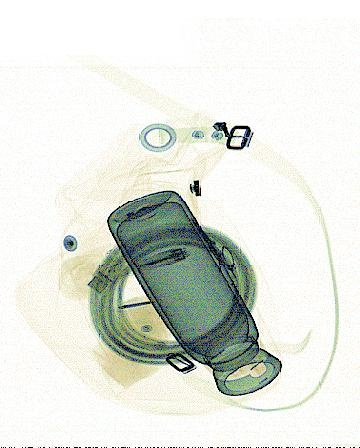

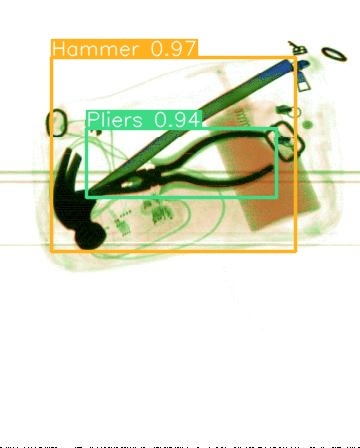

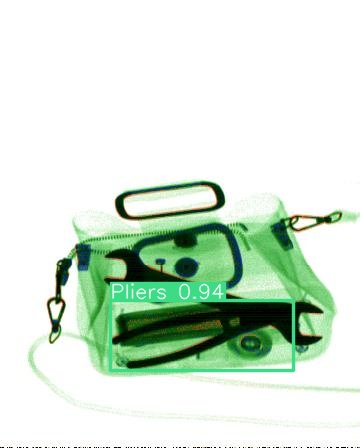

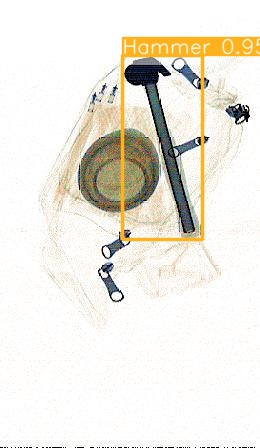

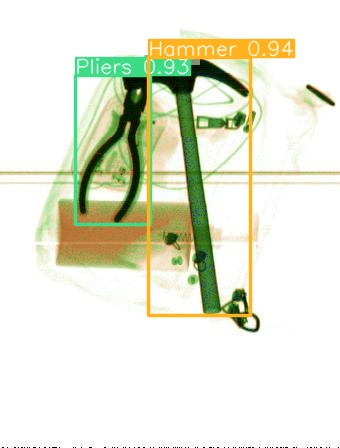

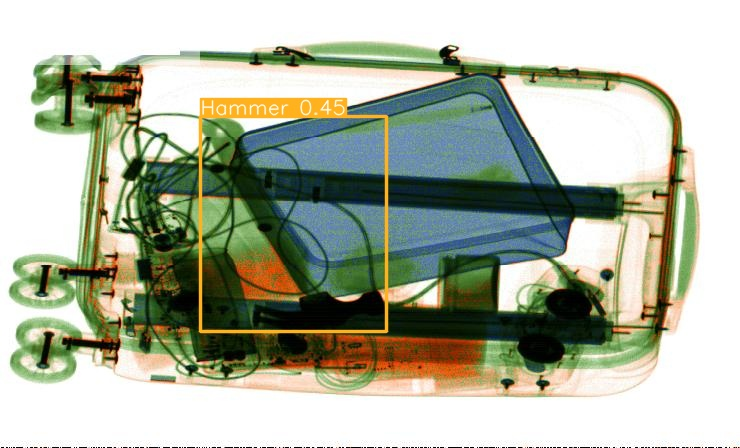

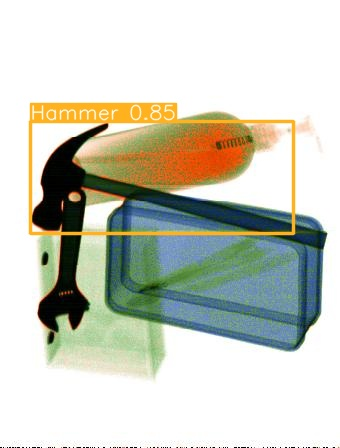

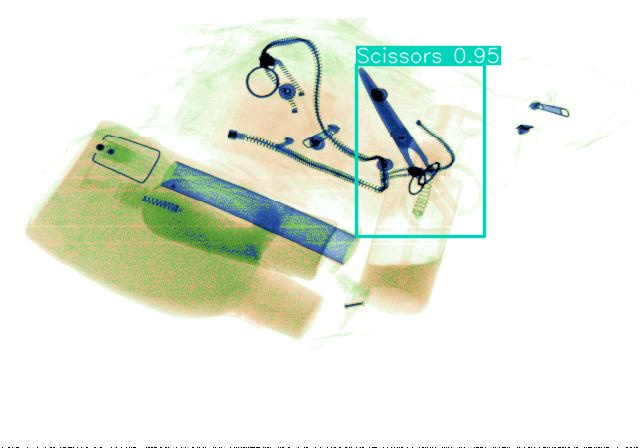

In [14]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/datasets/sixray100-1/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)


image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 48.0ms
Speed: 2.5ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1537/1537 [01:05<00:00, 23.36it/s]


                   all       1537       1627      0.783      0.799      0.824        0.7
Speed: 0.4ms preprocess, 39.3ms inference, 0.0ms loss, 0.9ms postprocess per image

PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (83.6 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 2.8s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript' (167.0 MB)

Export complete (3.0s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 data=/kaggle/working/datasets/sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading /kaggle/working/YOLO_weights/SIXray_Output/w

val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1537/1537 [01:09<00:00, 22.21it/s]

                   all       1537       1627      0.774        0.8      0.828      0.704
Speed: 0.4ms preprocess, 39.5ms inference, 0.0ms loss, 2.3ms postprocess per image



PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (83.6 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 3.2s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx' (166.6 MB)

Export complete (3.3s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx imgsz=640 data=/kaggle/working/datasets/sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading /kaggle/working/YOLO_weights/SIXray_Outp

2024-01-14 19:08:22.233403832 [E:onnxruntime:, sequential_executor.cc:514 ExecuteKernel] Non-zero status code returned while running Softmax node. Name:'/model.22/dfl/Softmax' Status Message: /onnxruntime_src/onnxruntime/core/framework/bfc_arena.cc:376 void* onnxruntime::BFCArena::AllocateRawInternal(size_t, bool, onnxruntime::Stream*, bool, onnxruntime::WaitNotificationFn) Failed to allocate memory for requested buffer of size 2150400



================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 3.0s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx' (166.6 MB)

TensorRT: starting export with TensorRT 8.4.3.1...
[01/14/2024-19:08:25] [TRT] [I] The logger passed into createInferBuilder differs from one already provided for an existing builder, runtime, or refitter. Uses of the global logger, returned by nvinfer1::getLogger(), will return the existing value.
[01/14/2024-19:08:25] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 9976, GPU 12285 (MiB)
[01/14/2024-19:08:25] [TRT] [I] ----------------------------------------------------------------
[01/14/2024-19:08:25] [TRT] [I] Input filename:   /kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx
[01/14/2024-19:08:25] [TRT] [I] ONNX IR version:  0.0.8
[01/14/2024-19

val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1537/1537 [01:37<00:00, 15.79it/s]

                   all       1537       1627      0.774        0.8      0.828      0.704
Speed: 0.6ms preprocess, 55.3ms inference, 0.0ms loss, 0.7ms postprocess per image



PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (83.6 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: simplifying with onnxsim 0.4.35...
ONNX: export success ✅ 24.9s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx' (166.6 MB)
TensorFlow SavedModel: running 'onnx2tf -i "/kaggle/working/YOLO_weights/SIXray_Output/weights/best.onnx" -o "/kaggle/working/YOLO_weights/SIXray_Output/weights/best_saved_model" -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 54.6s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best_saved_model' (416.6 MB)

TensorFlow GraphDef: 

val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1537/1537 [01:38<00:00, 15.59it/s]

                   all       1537       1627      0.774        0.8      0.828      0.704
Speed: 0.6ms preprocess, 56.1ms inference, 0.0ms loss, 0.7ms postprocess per image
ERROR ❌️ Benchmark failure for TensorFlow Lite: inference not supported on GPU
ERROR ❌️ Benchmark failure for TensorFlow Edge TPU: inference not supported on GPU
ERROR ❌️ Benchmark failure for TensorFlow.js: inference not supported on GPU



PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (83.6 MB)

PaddlePaddle: starting export with X2Paddle 1.4.1...
Exporting inference model from python code ('/kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model/x2paddle_code.py')... 

PaddlePaddle: export success ✅ 7.7s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model/' (333.2 MB)

Export complete (7.8s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model imgsz=640 data=/kaggle/working/datasets/sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading /kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model 

I0114 19:15:27.437193    26 analysis_predictor.cc:1626] MKLDNN is enabled
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [mkldnn_placement_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [matmul_v2_scale_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
--- Running IR pass [matmul_scale_fuse_pass]
--- Running I

image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x640 1 Knife, 1907.4ms
Speed: 3.1ms preprocess, 1907.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Loading /kaggle/working/YOLO_weights/SIXray_Output/weights/best_paddle_model for PaddlePaddle inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models


I0114 19:15:31.358417    26 analysis_predictor.cc:1626] MKLDNN is enabled
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [mkldnn_placement_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [gpu_cpu_squeeze2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_reshape2_matmul_fuse_pass]
--- Running IR pass [gpu_cpu_flatten2_matmul_fuse_pass]
--- Running IR pass [matmul_v2_scale_fuse_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_mul_pass]
--- Running IR pass [gpu_cpu_map_matmul_v2_to_matmul_pass]
--- Running IR pass [matmul_scale_fuse_pass]
--- Running I

2
